# Lasso

In [1]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1)

In [2]:
reg.predict([[1, 1]])

array([0.8])

# L1-based models for Sparse Signals

## Generate synthetic dataset

In [3]:
import numpy as np
rng = np.random.RandomState(0)
n_samples, n_features,n_informative = 50, 100, 10
time_step = np.linspace(-2, 2, n_samples)
freqs = 2 * np.pi * np.sort(rng.rand(n_features)) / 0.01
X = np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step)

idx = np.arange(n_features)
true_coef =  (-1) ** idx * np.exp(-idx / 10)
true_coef[n_informative:] = 0
y = np.dot(X, true_coef)

In [4]:
freqs[:n_informative]

array([ 2.9502547 , 11.8059798 , 12.63394388, 12.70359377, 24.62241605,
       37.84077985, 40.30506066, 44.63327171, 54.74495357, 59.02456369])

In [5]:
for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step + 2 * (rng.random_sample() - 0.5))
    X[:, i] += 0.2 * rng.normal(0, 1, n_samples)

y += 0.2 * rng.normal(0, 1, n_samples)

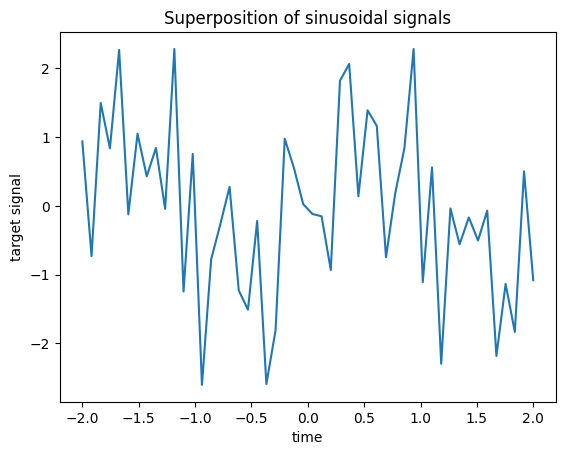

In [6]:
import matplotlib.pyplot as plt

plt.plot(time_step, y)
plt.ylabel("target signal")
plt.xlabel("time")
_ = plt.title("Superposition of sinusoidal signals")

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

## *Lasso:*

In [9]:
from time import time

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

t0 = time()
lasso = Lasso(alpha=0.14).fit(X_train, y_train)
print(f"Lasso fit ddone in {(time() - t0):.3}s")

y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso r^2 on test data : {r2_score_lasso:.3f}")

Lasso fit ddone in 0.00143s
Lasso r^2 on test data : 0.480


## *Automatic Relevance Determination (ARD):*

In [10]:
from sklearn.linear_model import ARDRegression

t0 = time()
ard = ARDRegression().fit(X_train, y_train)
print(f"ARD fit done in {(time() - t0):.3f}s")

y_pred_ard = ard.predict(X_test)
r2_score_ard = r2_score(y_test, y_pred_ard)
print(f"ARD r^2 on test data : {r2_score_ard:.3f}")

ARD fit done in 0.051s
ARD r^2 on test data : 0.543


## *ElasticNet:*

In [11]:
from sklearn.linear_model import ElasticNet

t0 = time()
enet = ElasticNet(alpha=0.08, l1_ratio=0.5).fit(X_train, y_train)
print(f"ElasticNet fit done in {(time() - t0):.3f}s")

y_pred_enet = enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(f"ElasticNet r^2 on test data : {r2_score_enet:.3f}")

ElasticNet fit done in 0.002s
ElasticNet r^2 on test data : 0.636


## *Plot and analysis of the results:*

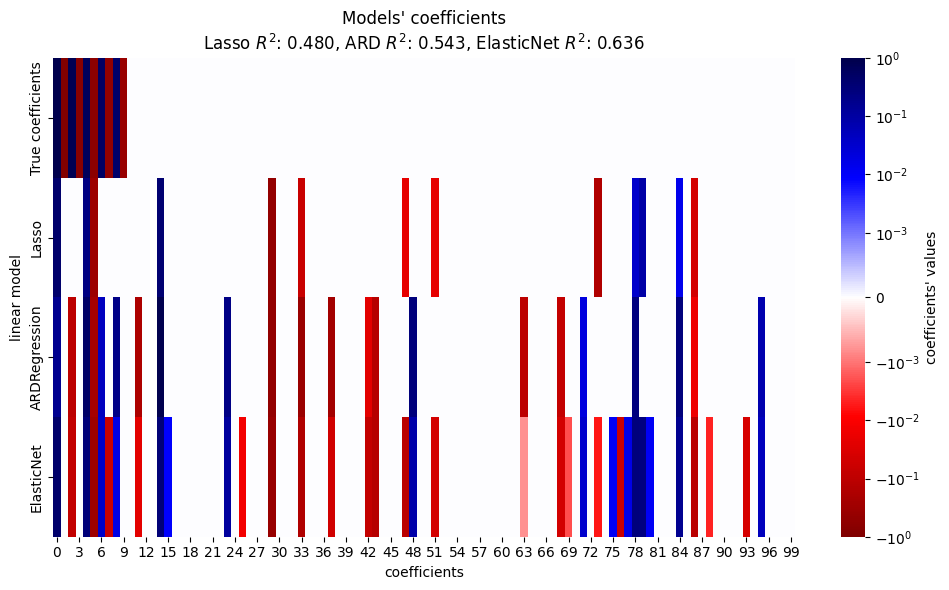

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import SymLogNorm

df = pd.DataFrame(
    {
        "True coefficients": true_coef,
        "Lasso": lasso.coef_,
        "ARDRegression": ard.coef_,
        "ElasticNet": enet.coef_,
    }
)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    df.T,
    norm=SymLogNorm(linthresh=10e-4, vmin=-1, vmax=1),
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)

plt.ylabel("linear model")
plt.xlabel("coefficients")
plt.title(
    f"Models' coefficients\nLasso $R^2$: {r2_score_lasso:.3f}, "
    f"ARD $R^2$: {r2_score_ard:.3f}, "
    f"ElasticNet $R^2$: {r2_score_enet:.3f}"
)

plt.tight_layout()